In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [248]:
# Loading the dataset
data=pd.read_csv("data.csv")
print("Original DataFrame:")
data.head()
print(data.info())
print(data.describe())

Original DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS    

# Data Preprocessing


In [250]:
# Droping unnecessary columns
data_cleaned = data.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "name"])
data_cleaned.head()

,brand,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,Lenovo,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,Apple,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


<Axes: >

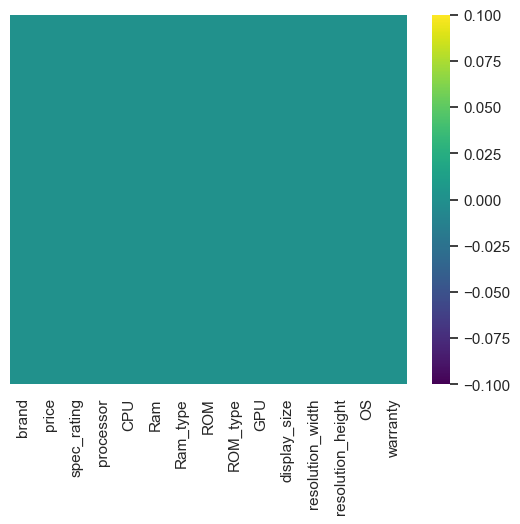

In [252]:
# Checking for NULL values
sns.heatmap(data_cleaned.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

In [254]:
for column_name in data_cleaned.columns:
    unique_values = len(data_cleaned[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'brand' has '30' unique values
Feature 'price' has '464' unique values
Feature 'spec_rating' has '30' unique values
Feature 'processor' has '184' unique values
Feature 'CPU' has '29' unique values
Feature 'Ram' has '7' unique values
Feature 'Ram_type' has '12' unique values
Feature 'ROM' has '7' unique values
Feature 'ROM_type' has '2' unique values
Feature 'GPU' has '134' unique values
Feature 'display_size' has '18' unique values
Feature 'resolution_width' has '18' unique values
Feature 'resolution_height' has '22' unique values
Feature 'OS' has '14' unique values
Feature 'warranty' has '4' unique values


Text(0.5, 1.0, 'Top 10 Expensive Laptop Brands')

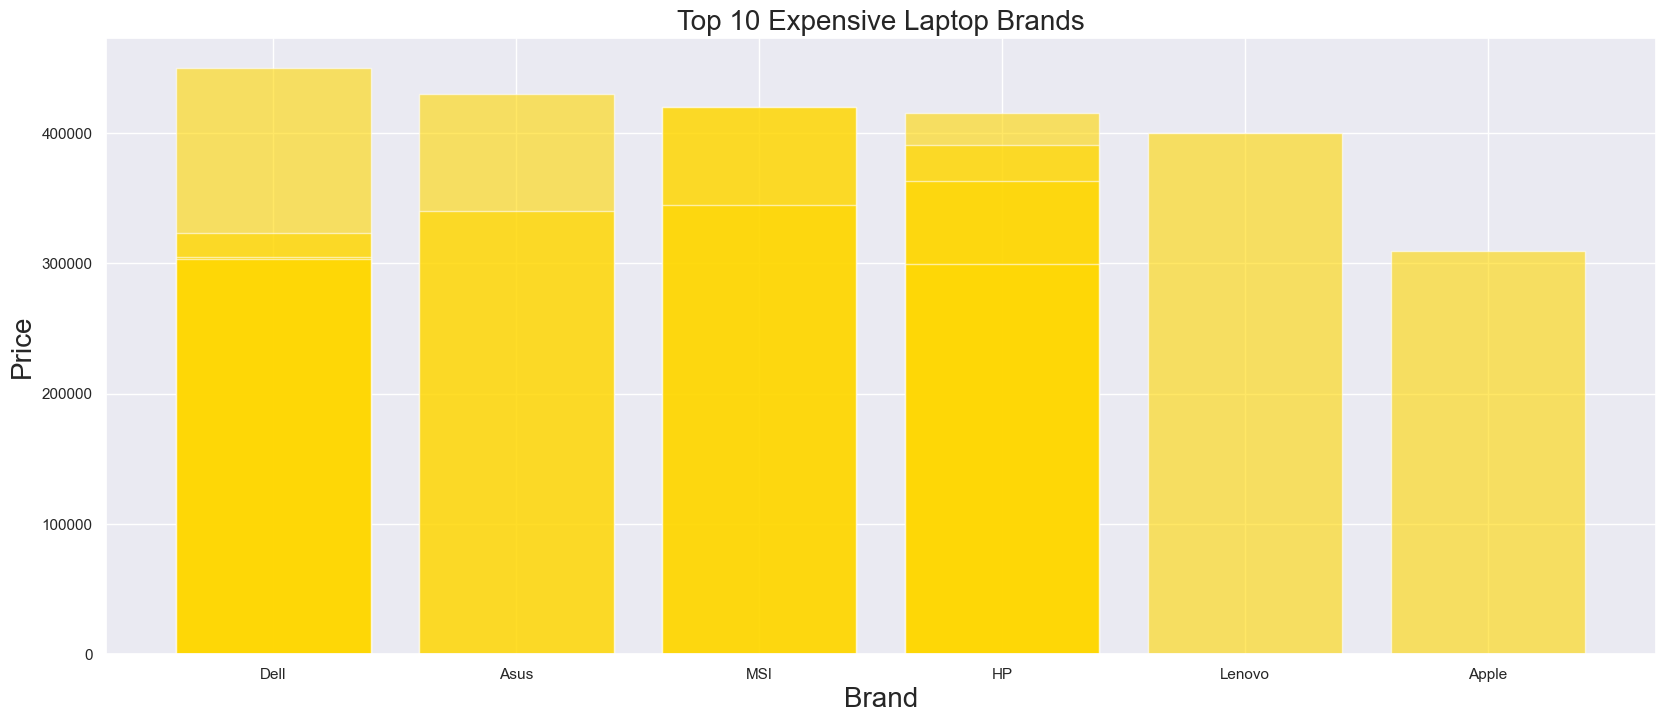

In [256]:
top10 = data_cleaned.nlargest(15,'price')
plt.figure(figsize=(20,8))
plt.bar(top10['brand'], top10['price'],color='gold',alpha=0.6)
plt.ylabel('Price', fontsize = 20)
plt.xlabel("Brand", fontsize = 20)
plt.title("Top 10 Expensive Laptop Brands", fontsize = 20)

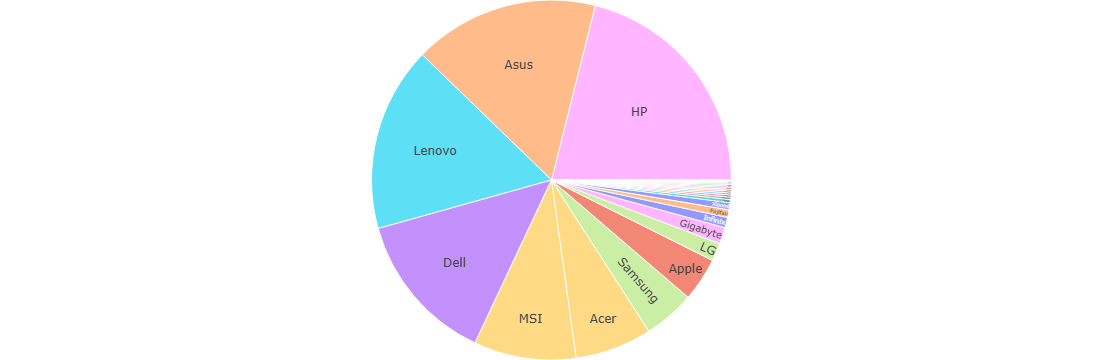

In [258]:
import plotly.express as px
fig = px.sunburst(data_cleaned, path=['brand'], values='price',color='brand')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

Text(0.5, 1.0, 'Top 10 Cheap Laptop Models')

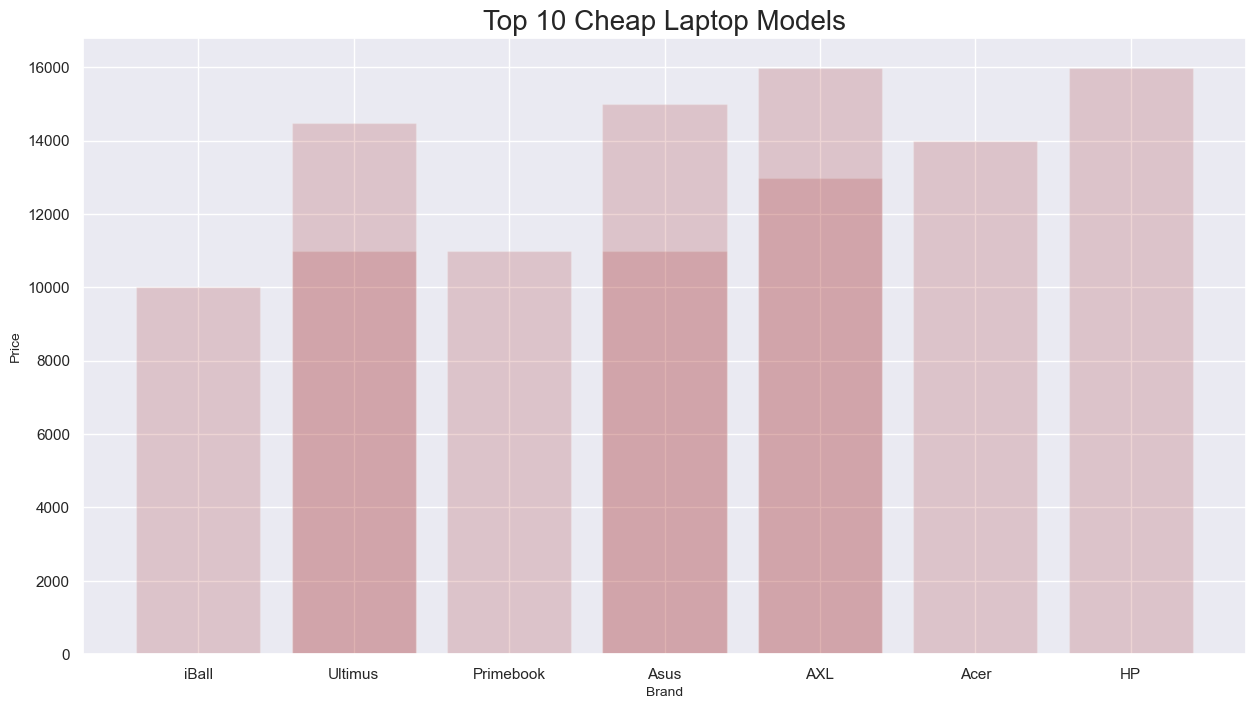

In [260]:
top10 = data_cleaned.nsmallest(10,'price')
plt.figure(figsize=(15,8))
plt.bar(top10['brand'], top10['price'],color='brown',alpha=0.2)
plt.ylabel('Price', fontsize = 10)
plt.xlabel("Brand", fontsize = 10)
plt.title("Top 10 Cheap Laptop Models", fontsize = 20)

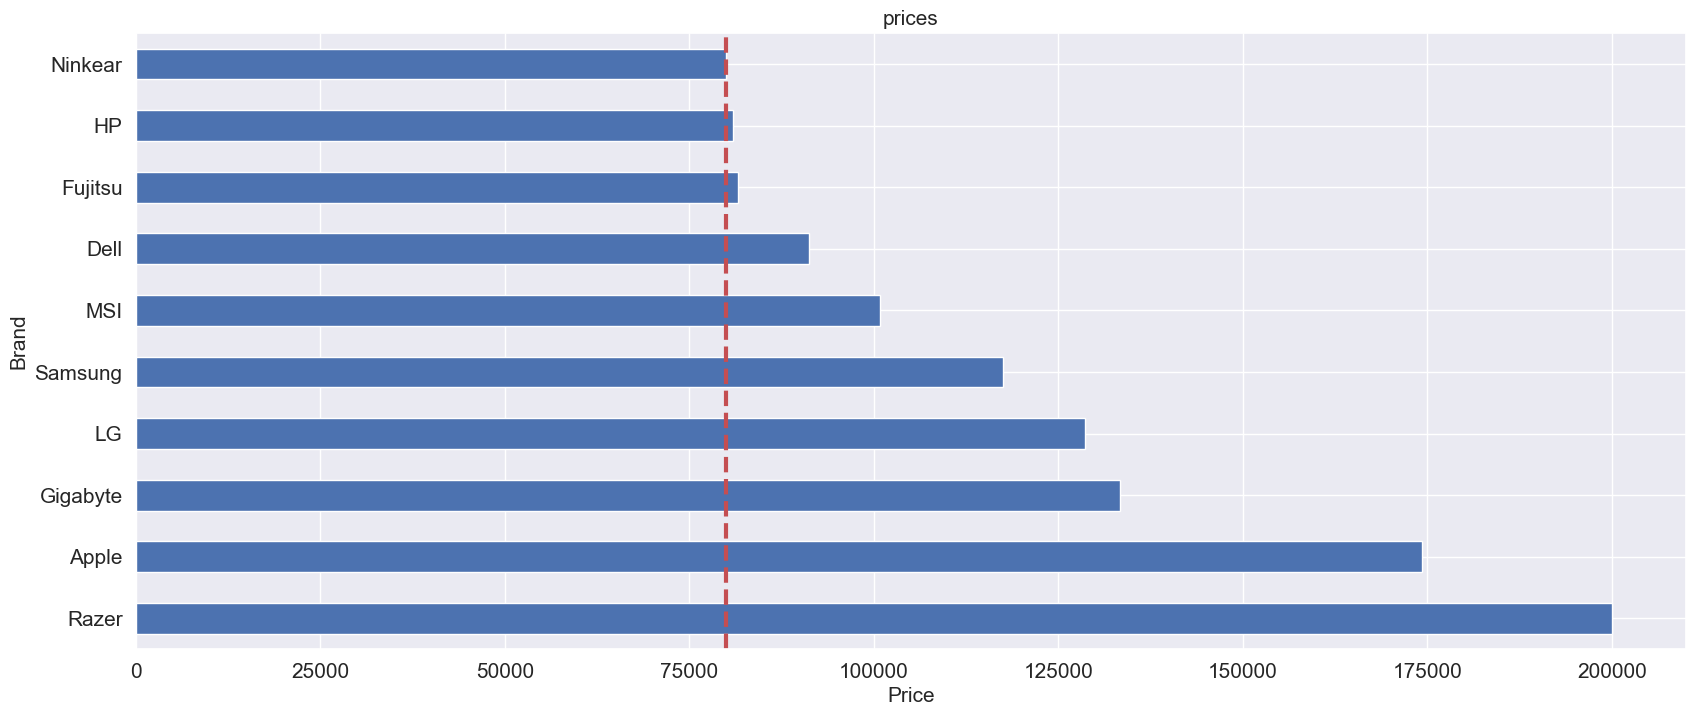

In [262]:
data_cleaned[['brand','price']].groupby('brand').mean().sort_values(by='price', ascending = False).head(10).plot(kind = 'barh', grid = True, figsize = (20,8), 
        fontsize = 15, rot =0, legend = None)
plt.axvline(data_cleaned['price'].mean(), color='r', linestyle='dashed', linewidth=3,label='the mean')
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Brand', fontsize = 15)
plt.title("prices", fontsize = 15)
plt.show()

In [264]:
numeric=['price','spec_rating']

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

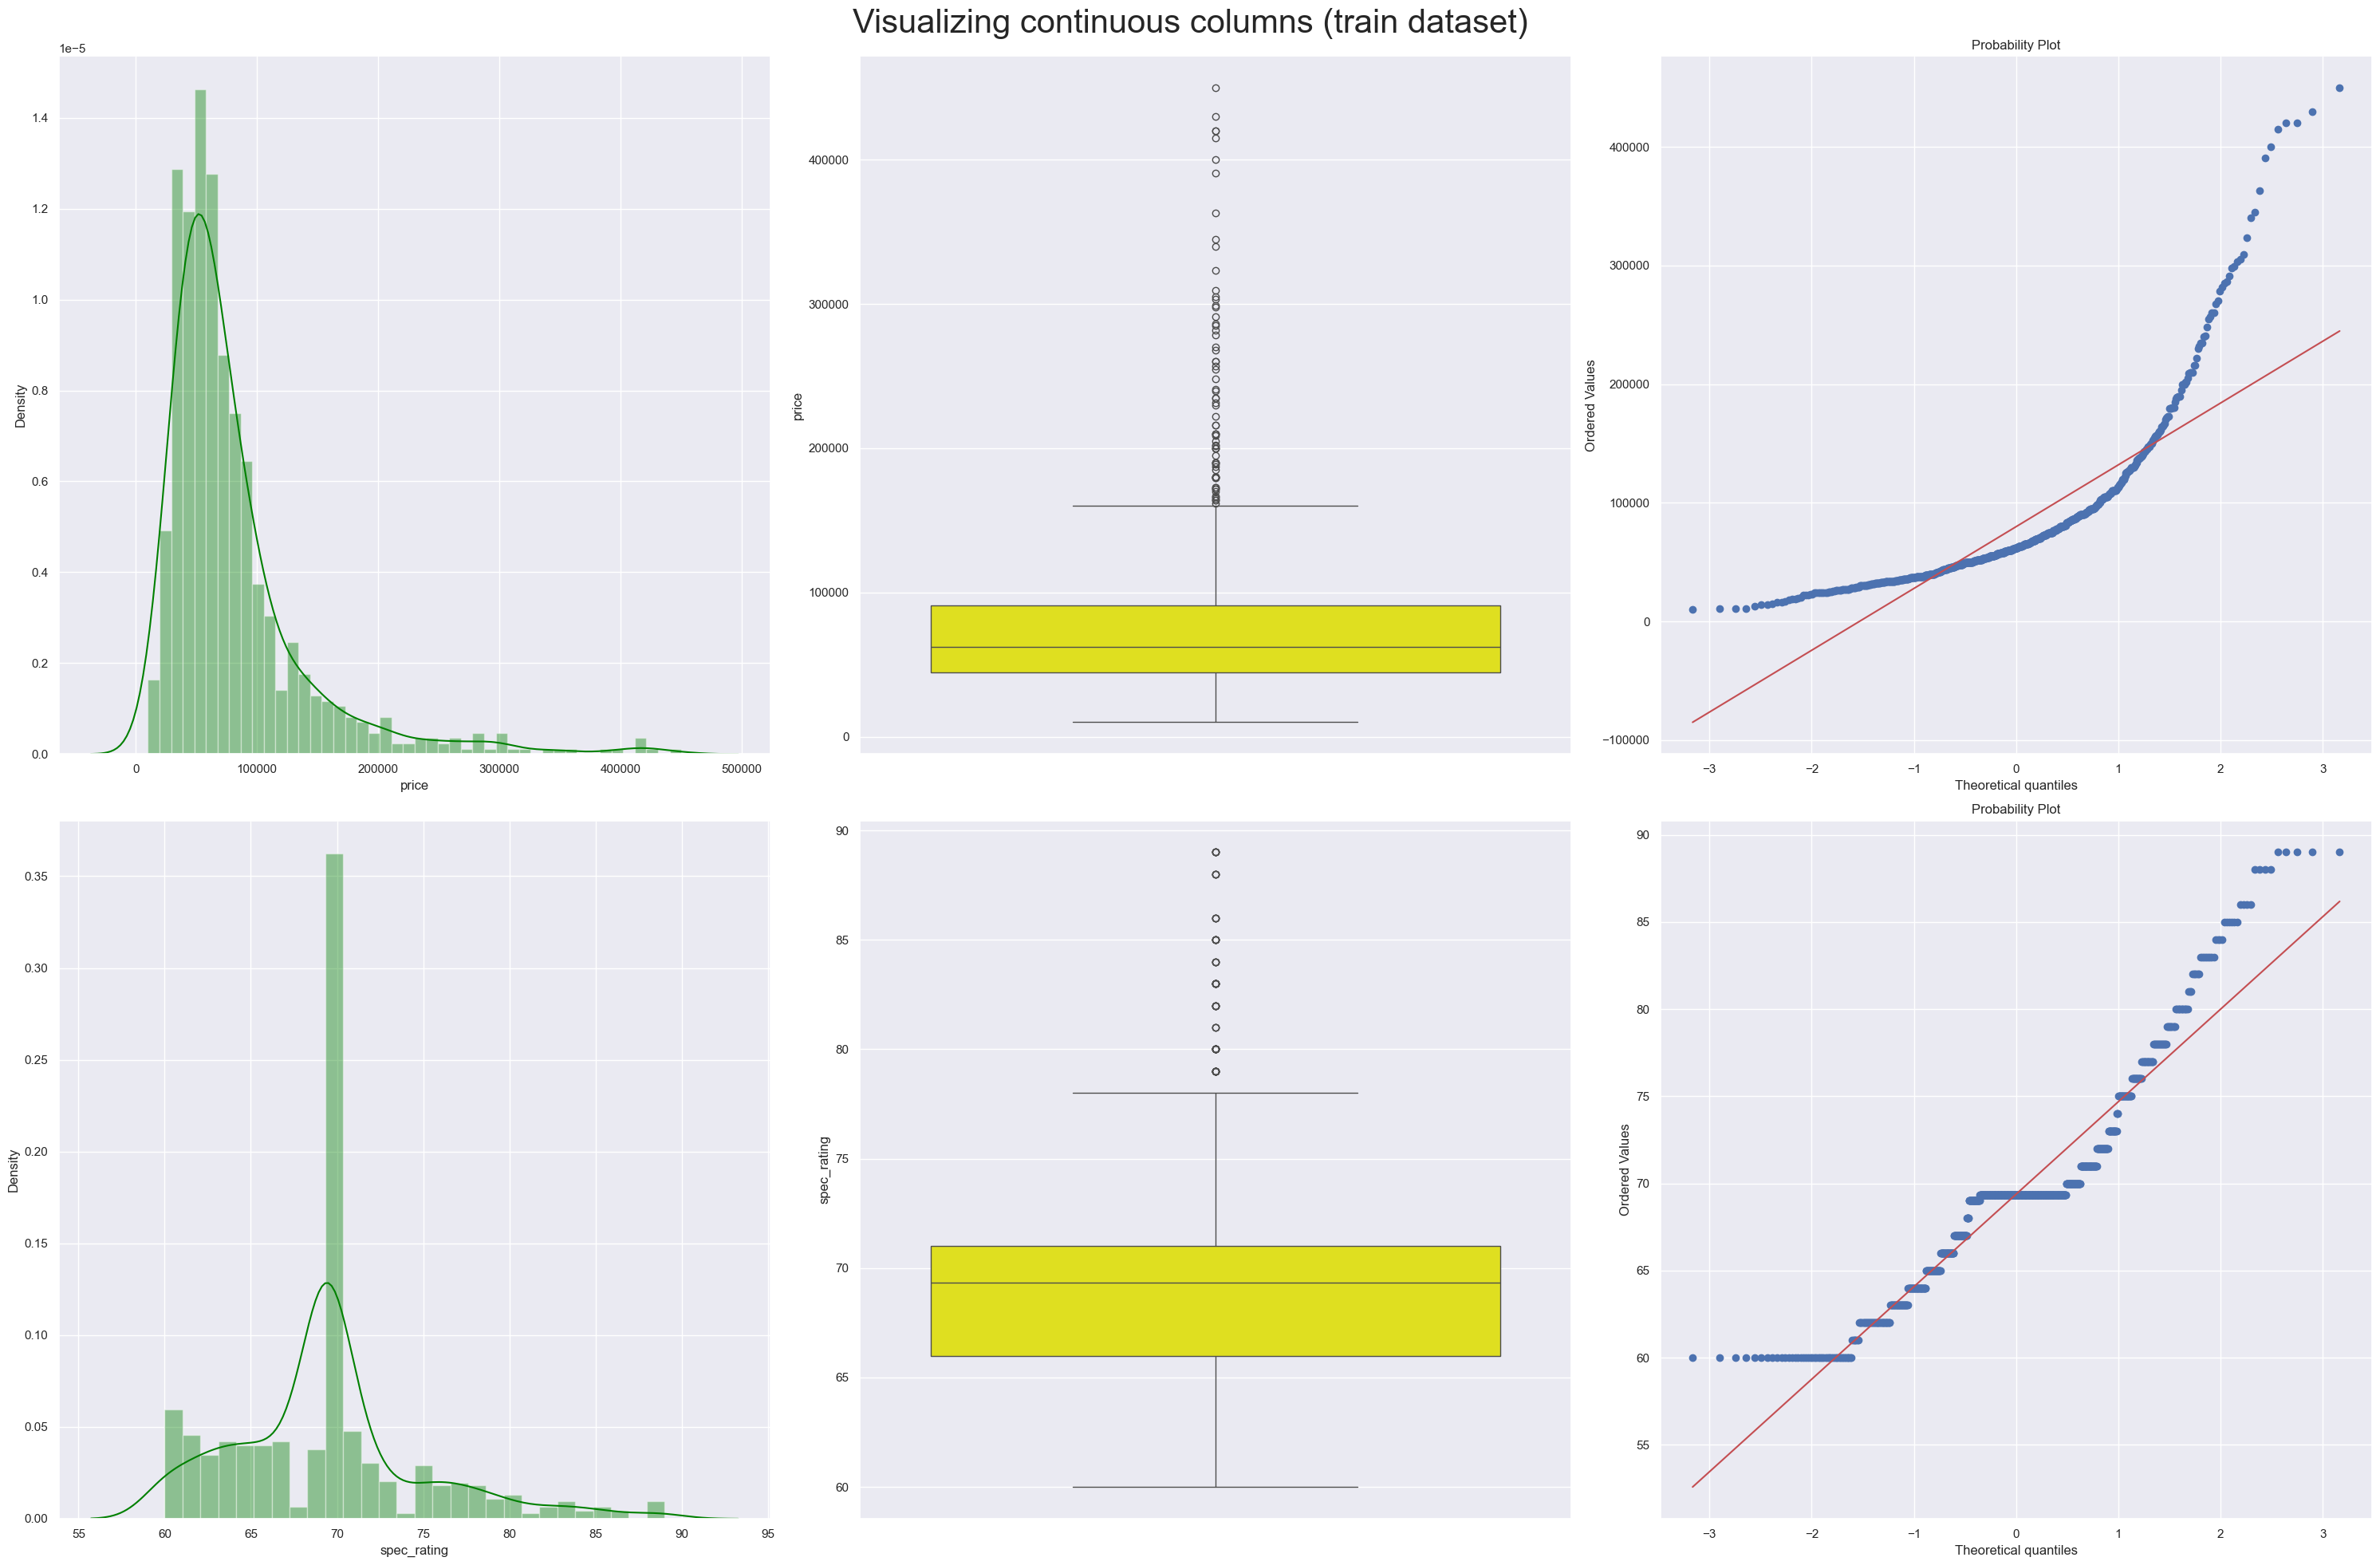

In [266]:
fig,ax = plt.subplots(len(numeric),3,figsize=(30,20))
for index,i in enumerate(numeric):
    sns.distplot(data_cleaned[i],ax=ax[index,0],color='green')
    sns.boxplot(data_cleaned[i],ax=ax[index,1],color='yellow')
    stats.probplot(data_cleaned[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

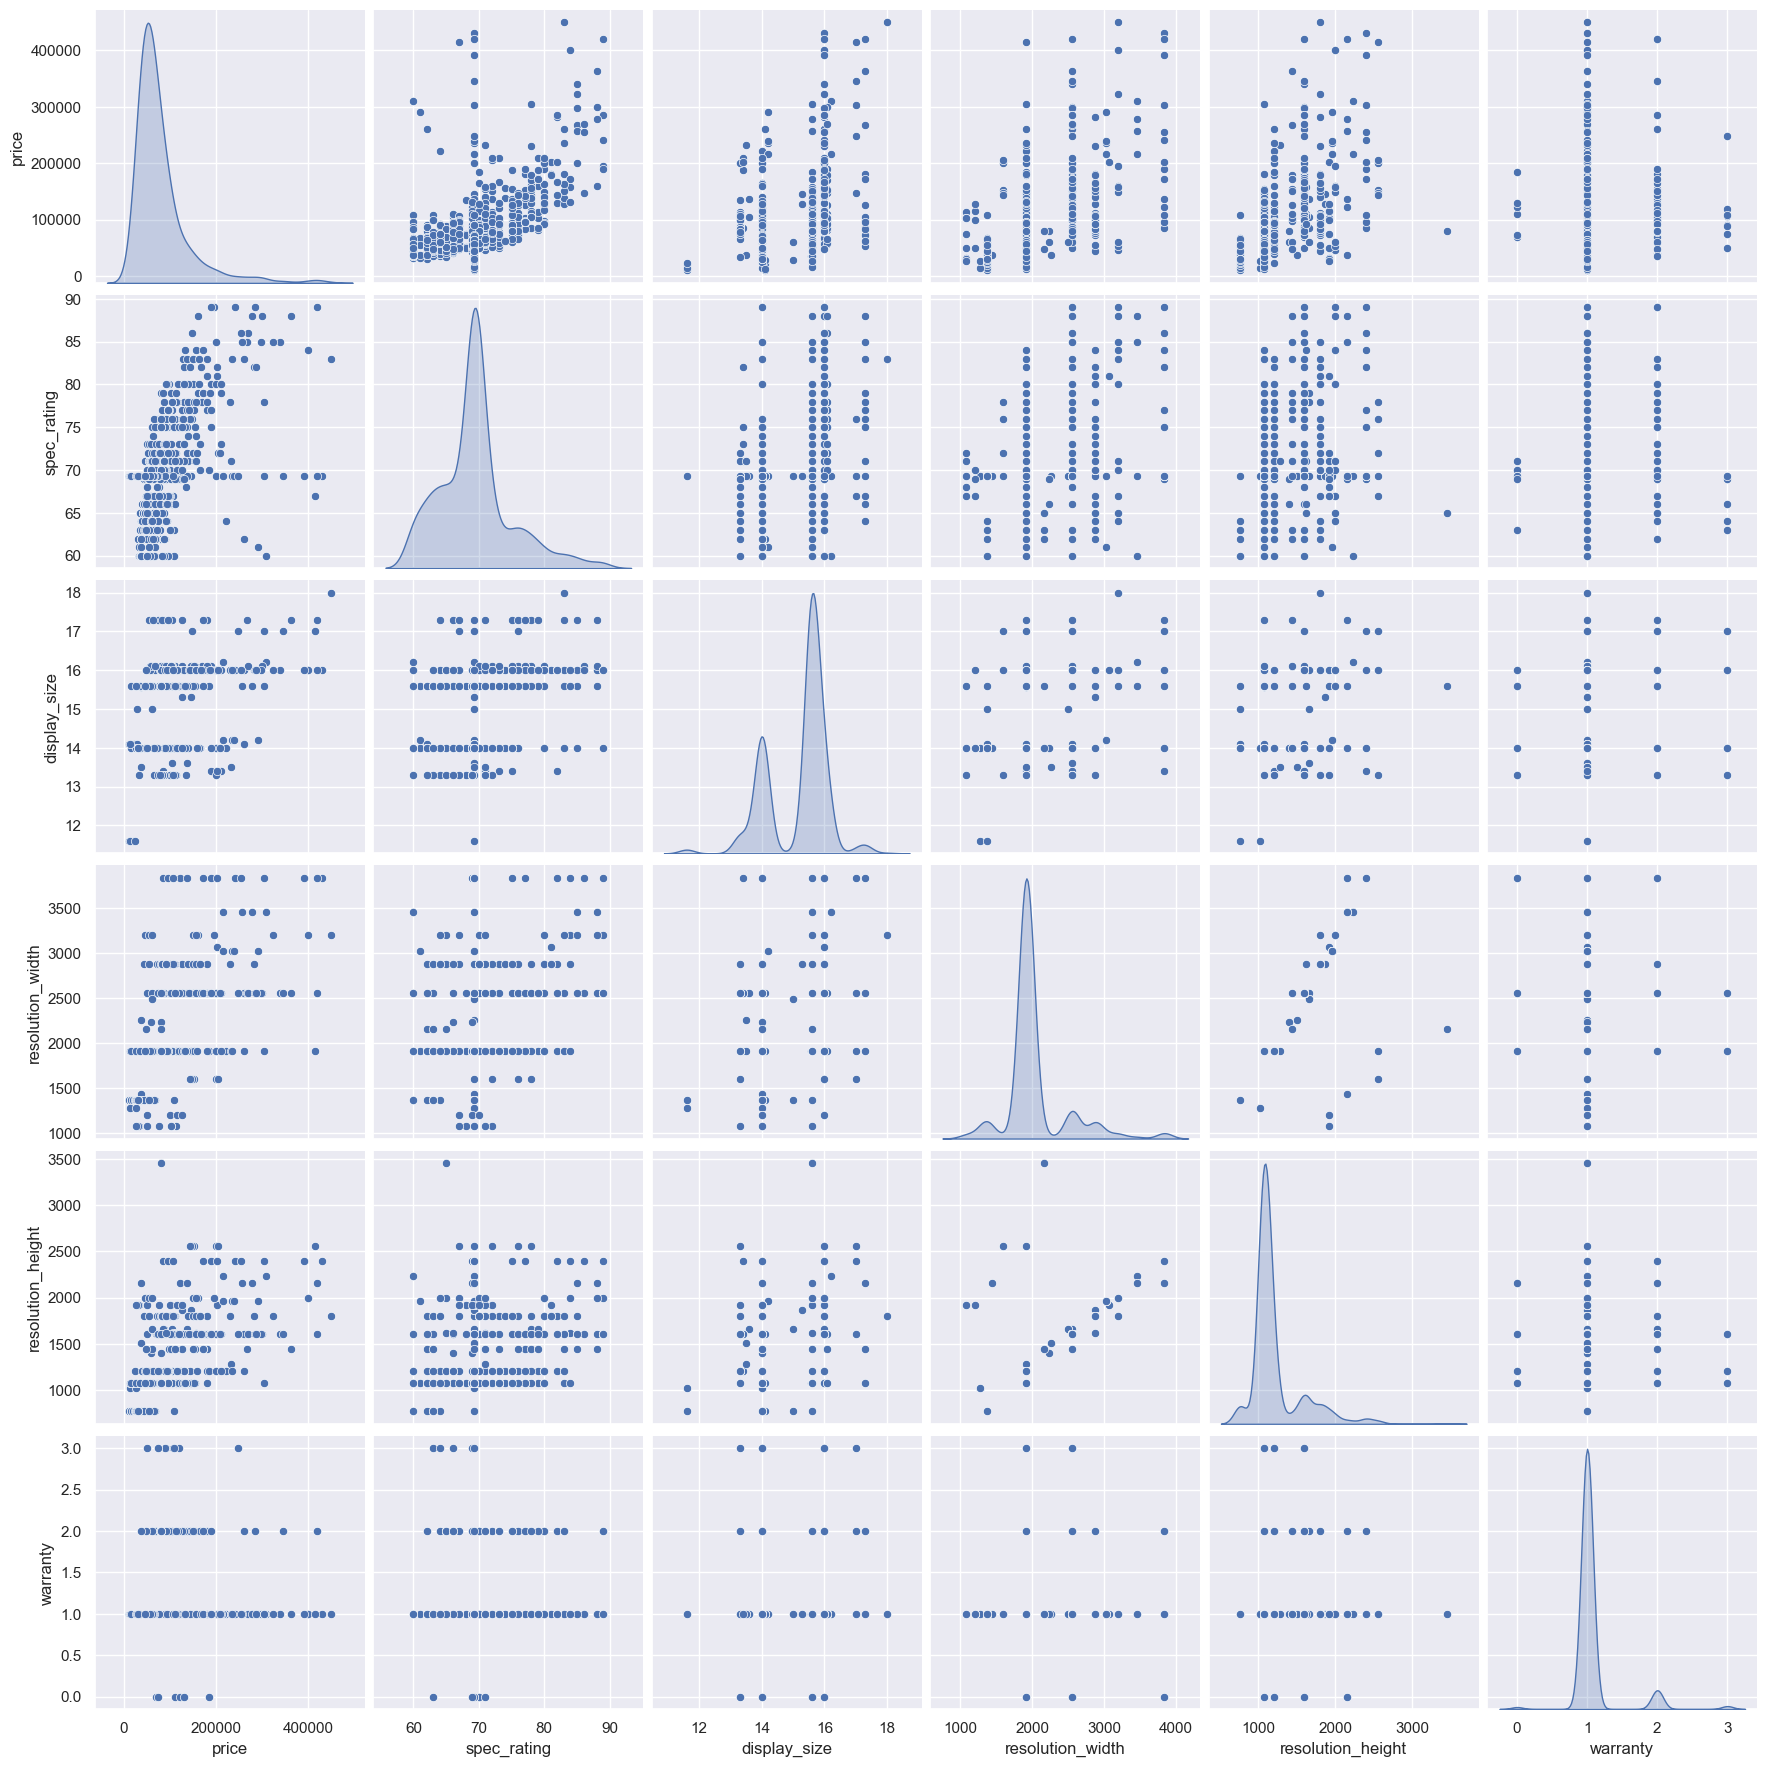

In [268]:
sns.set()
sns.pairplot(data_cleaned,height = 3,kind ='scatter',diag_kind='kde')
plt.show()

In [270]:
categorical_features=['brand','CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type',
       'display_size', 'resolution_width', 'resolution_height', 'OS',
       'warranty']

<Figure size 2500x4500 with 0 Axes>

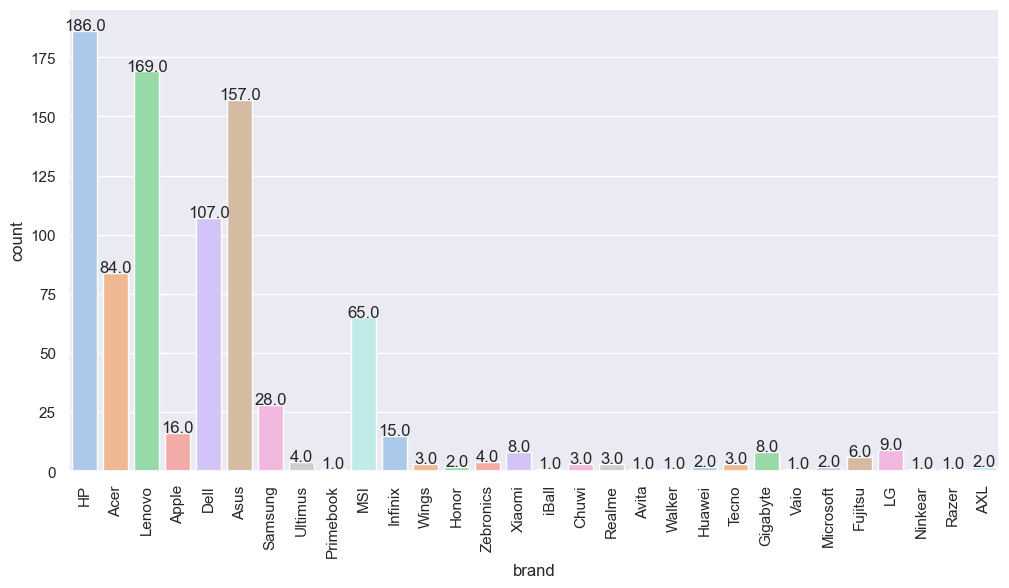

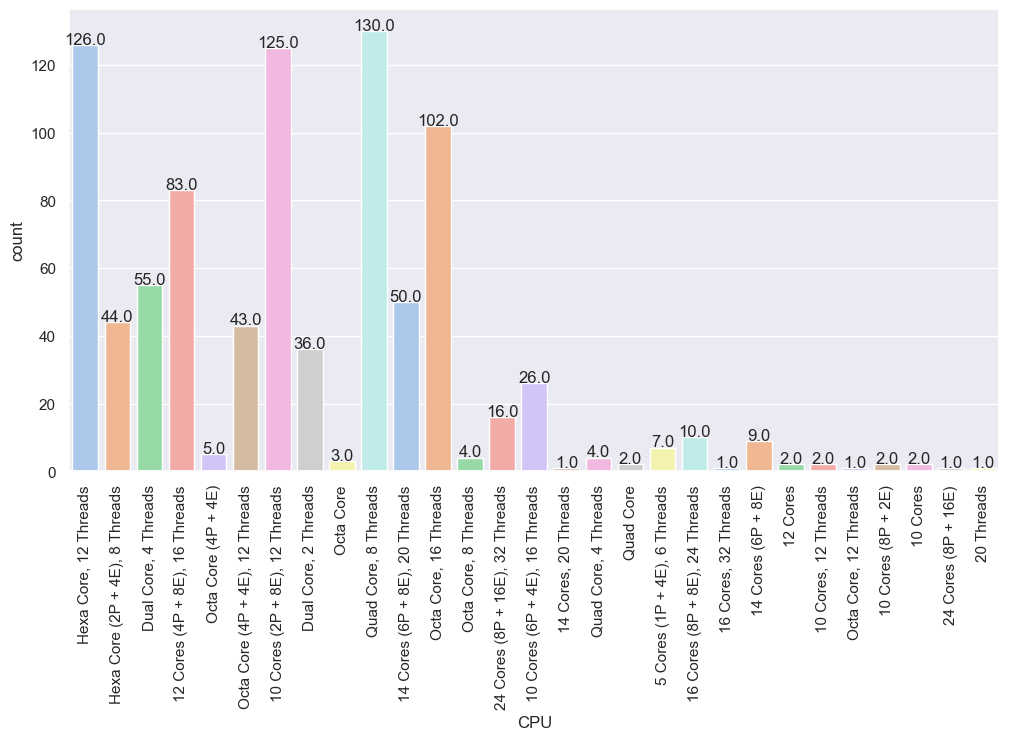

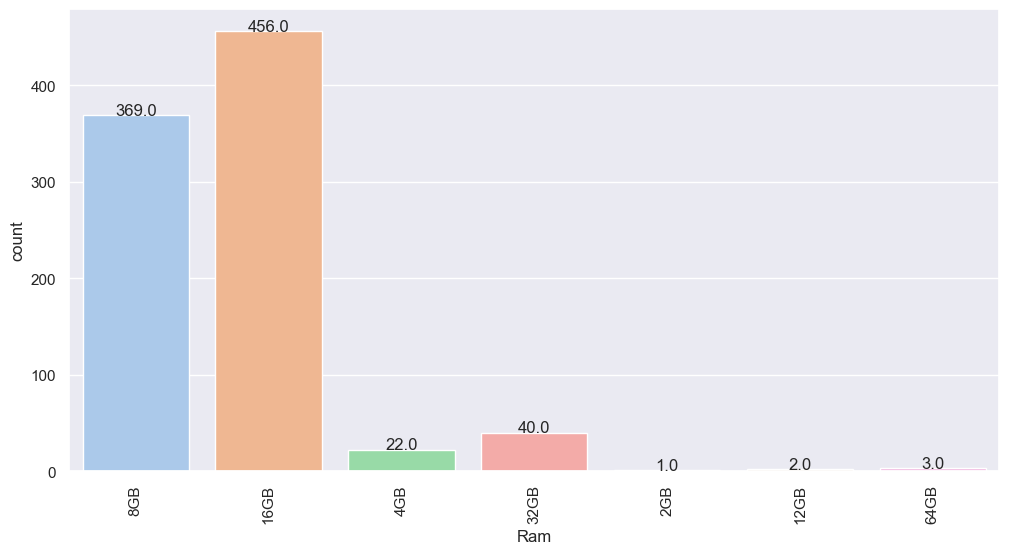

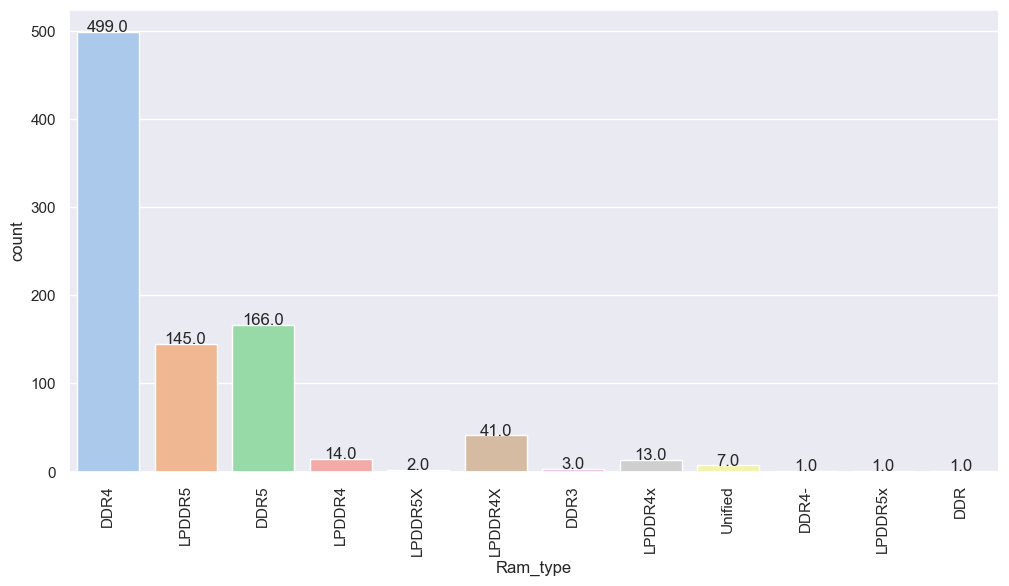

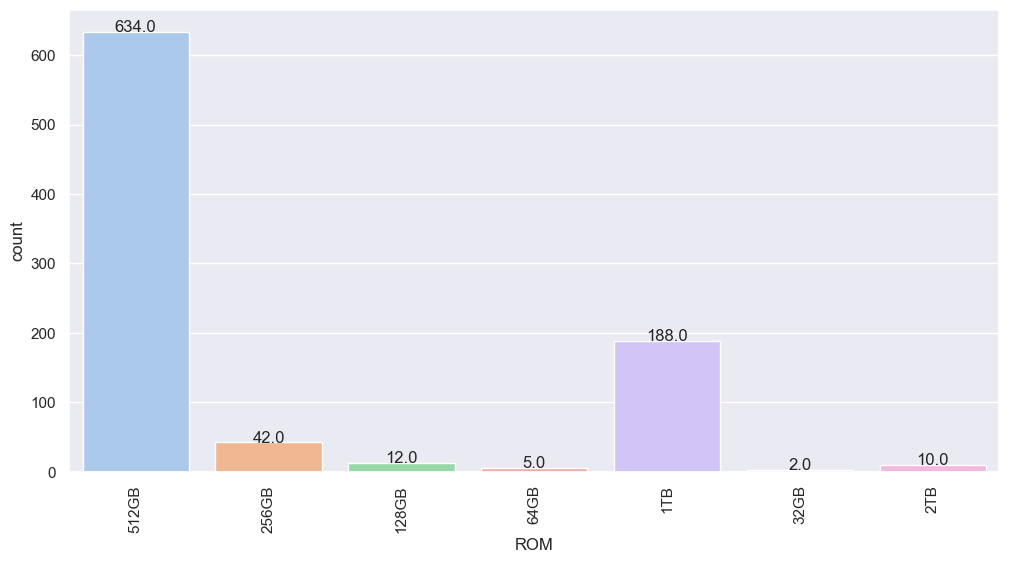

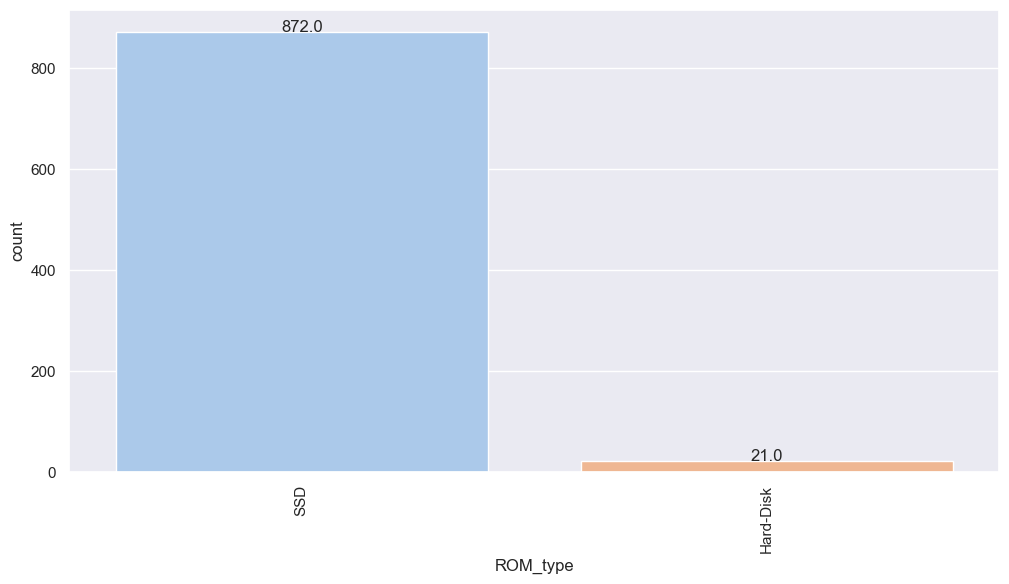

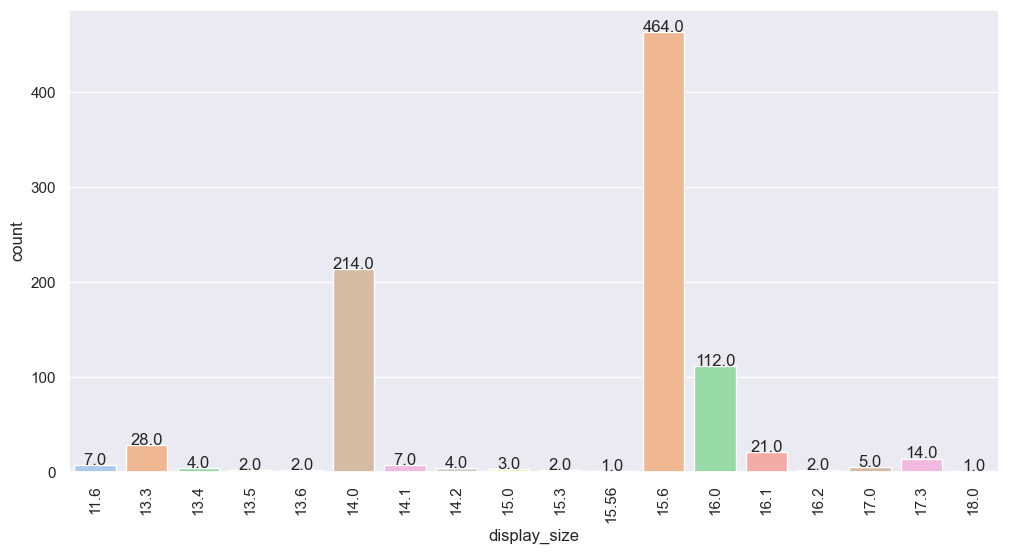

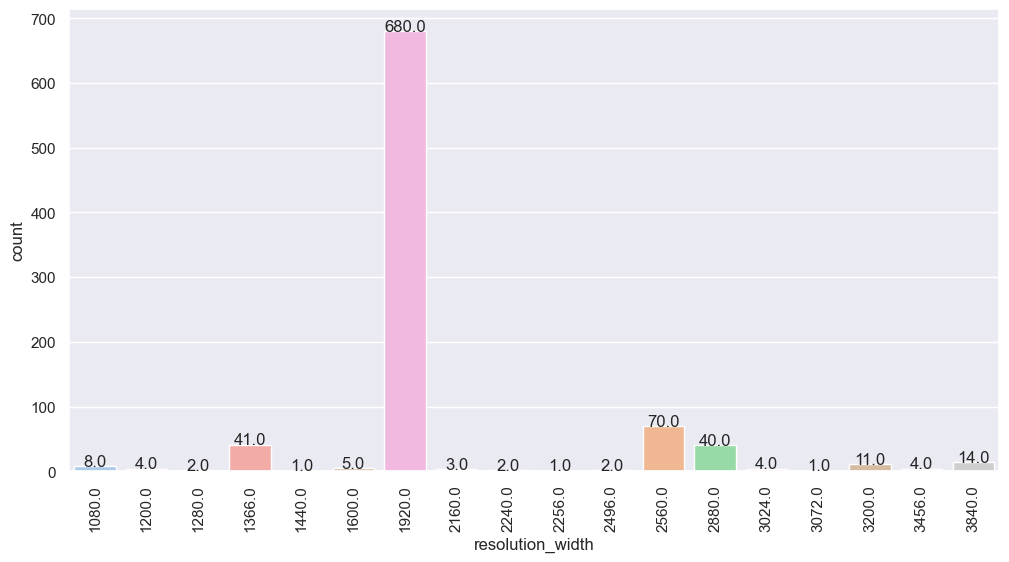

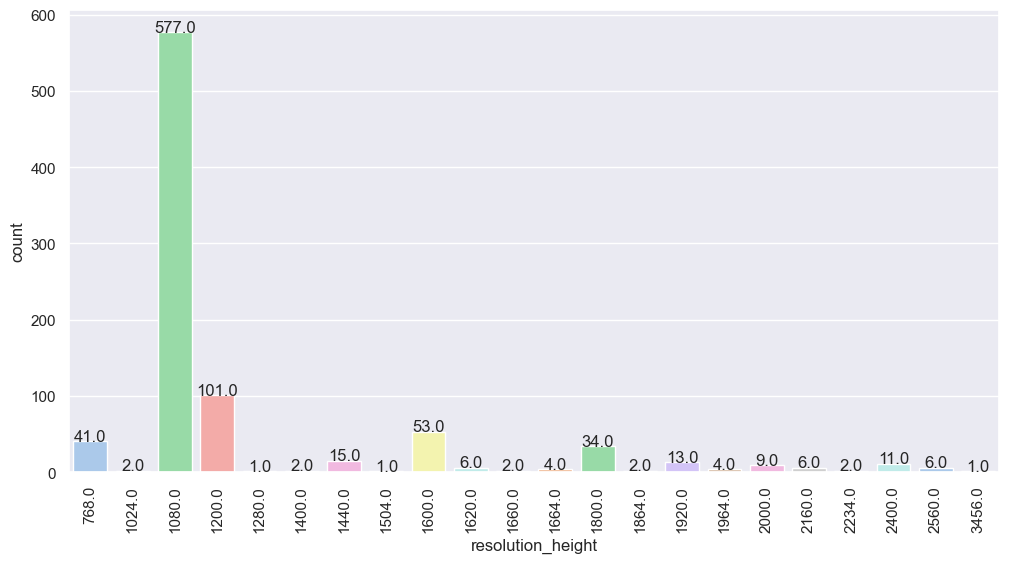

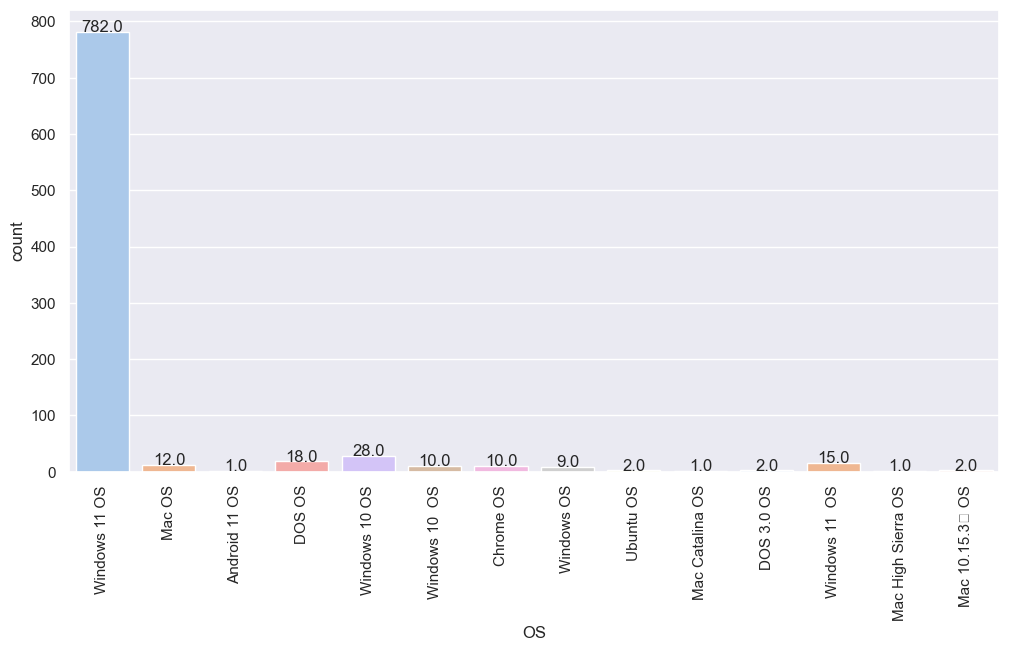

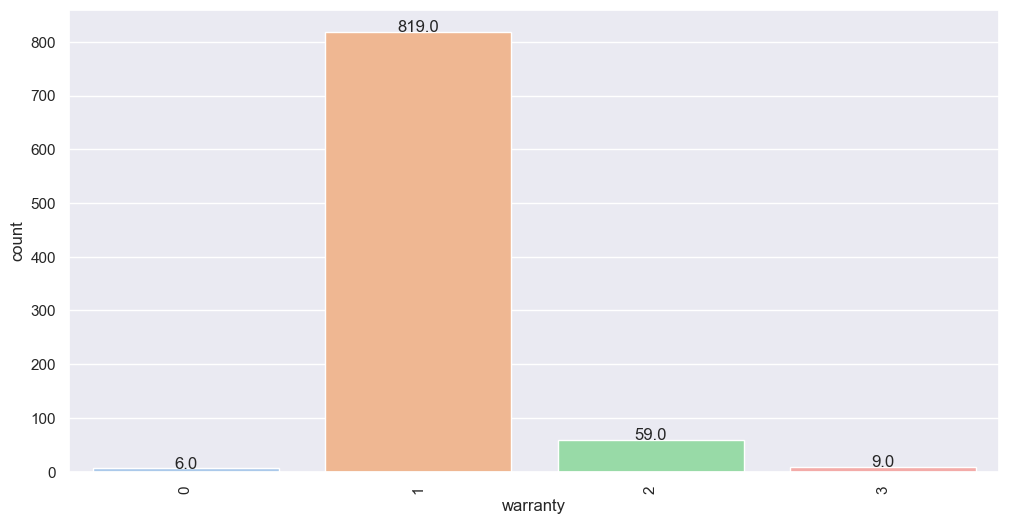

In [272]:
i=1
plt.figure(figsize = (25,45))
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(12,6))
  graph = sns.countplot(ax=ax1,x = feature , data = data_cleaned,palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.3,height ,ha="center")
  i+=1

Let's analyze the obtained graphs.

The largest number of laptops are produced under the brands ASUS, DELL, HP, Lenovo. Our data does not include quantitative notebook sales data, so a full market analysis is not possible.

The mode of the display_size variable is 15.6, indicating high buyer demand. This is due to the fact that these laptops are used both at work and at home

In the ram_gb variable, the value of 8 Gb is the mode. This means that this amount of memory is enough for most tasks. Demand creates supply:) *Most laptops are sold with an SSD drive. Many manufacturers, in an effort to win in the competition, save on additional slots in laptops by installing only one storage device. Choosing such a model, for example, with a fast SSD, you risk being left without a system and without personal data. The option with one HDD is also not very preferable, because. This type of media today demonstrates very low data exchange rates. Your system will be slow to boot, and applications will be annoying with the slowness of launching and processing data. Thereforechoosing a device, give preference to the SSD + HDD dual disk system.

The most common operating system value is Windows 64-bit. This can be explained by the simplicity and cheapness of using this system, as well as a much more extended distribution of programs.

In [274]:
# Parse numerical values from 'Ram' and 'ROM'
data_cleaned['Ram'] = data_cleaned['Ram'].str.extract('(\d+)').astype(int)
data_cleaned['ROM'] = data_cleaned['ROM'].str.extract('(\d+)').astype(int)

In [276]:
data_cleaned.head()

,brand,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8,DDR4,512,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8,DDR4,512,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8,DDR4,512,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,Lenovo,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16,LPDDR5,512,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,Apple,69990,69.323529,Apple M1,Octa Core (4P + 4E),8,DDR4,256,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [280]:
# Encoding categorical features
label_encoders = {}
categorical_cols = ["brand", "processor", "CPU", "Ram_type", "ROM_type", "GPU", "OS"]
for col in categorical_cols:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le


In [282]:
data_cleaned.head()

,brand,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,9,49900,73.000000,105,19,8,2,512,1,19,15.6,1920.0,1080.0,12,1
1,9,39900,60.000000,34,18,8,2,512,1,126,15.6,1920.0,1080.0,12,1
2,1,26990,69.323529,15,17,8,2,512,1,123,14.0,1920.0,1080.0,12,1
3,14,59729,66.000000,39,6,16,8,512,1,111,14.0,2240.0,1400.0,12,1
4,2,69990,69.323529,160,21,8,2,256,1,91,13.3,2560.0,1600.0,7,1


In [284]:
# Separating features and target
X = data_cleaned.drop(columns=["price"])
y = data_cleaned["price"]

In [286]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [288]:
model = LogisticRegression() 
model.fit(X_train, y_train)

LogisticRegression()

In [290]:
# Make predictions
y_pred = model.predict(X_test)

In [292]:
# Evaluate the model 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

In [294]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1875691175.547486
R-squared: 0.4526157797214666


In [296]:
# Accuracy 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.0335195530726257


In [300]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
